In [2]:
import streamlit as st
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import requests


import numpy as np
from scipy.stats import *
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split


import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
le = LabelEncoder()

In [3]:
emission = pd.read_csv("greenhouse.csv")
emission.rename({"country_or_area": "country"}, axis=1, inplace=True)
emission["country_encoded"] = le.fit_transform(emission.country)
emission.head()

,country,year,value,category,country_encoded
0,Australia,2014,393126.946994,carbon_dioxide_co2_emissions_without_land_use_...,0
1,Australia,2013,396913.936530,carbon_dioxide_co2_emissions_without_land_use_...,0
2,Australia,2012,406462.847704,carbon_dioxide_co2_emissions_without_land_use_...,0
3,Australia,2011,403705.528314,carbon_dioxide_co2_emissions_without_land_use_...,0
4,Australia,2010,406200.993184,carbon_dioxide_co2_emissions_without_land_use_...,0


In [4]:
X = emission.drop(["country", "year", "category", "country_encoded"], axis=1)
y = emission["country_encoded"].values.reshape(-1,1)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

model = svm.SVC(C=0.02, gamma=0.06)
model.fit(X_train, Y_train)
pred = model.predict(X_test)


train_pred = model.predict(X_train)


print ("====  TEST ACCURACY ====")
print ("{} %".format(model.score(Y_test, pred) * 100))

print ("==== Training Accuracy ====")
print ("{} %".format(model.score(Y_train, train_pred) * 100))

/Users/thomasnguyen/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


====  TEST ACCURACY ====


/Users/thomasnguyen/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


100.0 %
==== Training Accuracy ====


/Users/thomasnguyen/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


100.0 %


In [5]:
emission.columns

Index(['country', 'year', 'value', 'category', 'country_encoded'], dtype='object')

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
std = StandardScaler()

emission["scaled_value"] = std.fit_transform(emission["value"].values.reshape(-1,1))

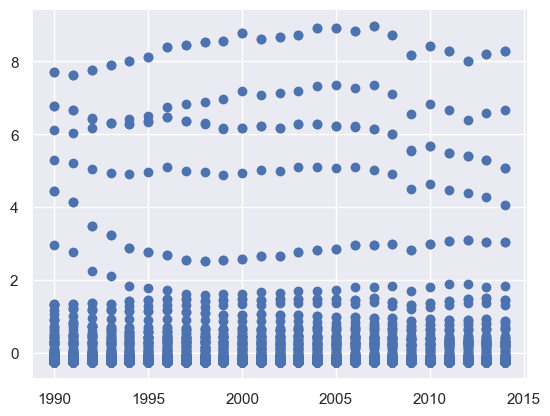

In [8]:
sns.set()
plt.scatter(emission.year, emission.scaled_value)

In [9]:
from sklearn.decomposition import PCA


In [10]:
import random as rd
genes = ["gene" + str(i) for i in range(1,101)]

wt = ["wt" + str(i) for i in range(1,6)]
ko = ["ko" + str(i) for i in  range(1,6)]

data = pd.DataFrame(columns=[*wt, *ko], index=genes)

for gene in data.index:
    data.loc[gene, "wt1": "wt5"] = np.random.poisson(lam=rd.randrange(10, 1000), size=5)
    data.loc[gene, "ko1": "ko5"] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
data

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,815,841,793,790,773,543,527,524,557,495
gene2,842,927,889,915,898,489,472,472,487,530
gene3,752,704,749,715,758,1014,885,983,963,965
gene4,293,305,301,320,329,36,60,42,37,45
gene5,665,650,650,632,653,480,470,502,468,509
...,...,...,...,...,...,...,...,...,...,...
gene96,151,155,143,144,176,396,409,364,404,396
gene97,930,934,937,900,914,34,40,43,35,40
gene98,652,658,631,641,633,632,644,665,644,623
gene99,798,776,802,801,829,271,319,334,298,295


In [11]:
print (data.head())
print (data.columns)

       wt1  wt2  wt3  wt4  wt5   ko1  ko2  ko3  ko4  ko5
gene1  815  841  793  790  773   543  527  524  557  495
gene2  842  927  889  915  898   489  472  472  487  530
gene3  752  704  749  715  758  1014  885  983  963  965
gene4  293  305  301  320  329    36   60   42   37   45
gene5  665  650  650  632  653   480  470  502  468  509
Index(['wt1', 'wt2', 'wt3', 'wt4', 'wt5', 'ko1', 'ko2', 'ko3', 'ko4', 'ko5'], dtype='object')


In [12]:
from sklearn.preprocessing import StandardScaler


In [13]:
std = StandardScaler()

In [14]:
scaled_data = std.fit_transform(data.T)

[[ 1.07811911  0.73585064 -0.81928173  0.87196652  1.16588472 -0.87052249
   1.20717193  1.10012999 -0.95158151 -1.00245031  0.85001897 -0.70484935
  -0.35079567  1.14040592 -0.88189481  0.86978361 -0.98801513  1.12177042
   1.1189883  -0.90759665  1.08803612  1.31666668  0.95359311  1.10404757
   1.04850434 -0.92848549 -0.97321939 -0.96335563  0.92342329  1.39483638
   1.05046328  1.09557796  0.95668906  1.07834824 -1.0705076   0.95115982
  -1.07257885 -0.96633145  0.90597952  1.27441209  0.20965697  0.767822
  -1.01430747  1.12372399  0.99780824 -0.92383346  1.06343839  0.91909523
  -0.55620852 -0.97403206 -1.20150195  1.25668423 -1.08426861 -0.2931144
  -0.78868801 -1.01144054 -1.12932613  0.81825887 -1.0414967   1.40440256
  -0.70981088  1.03546421  1.15683572  1.08487846 -1.02412053 -1.16650523
   1.073436   -1.1101383  -0.95815429  1.05498269  0.34220278  0.91099118
  -1.0105497   1.14021093 -1.01493275  0.69464217 -0.99508939 -0.98751674
   0.97371909 -1.25148117 -0.63689557 -0.

<AxesSubplot: ylabel='Count'>

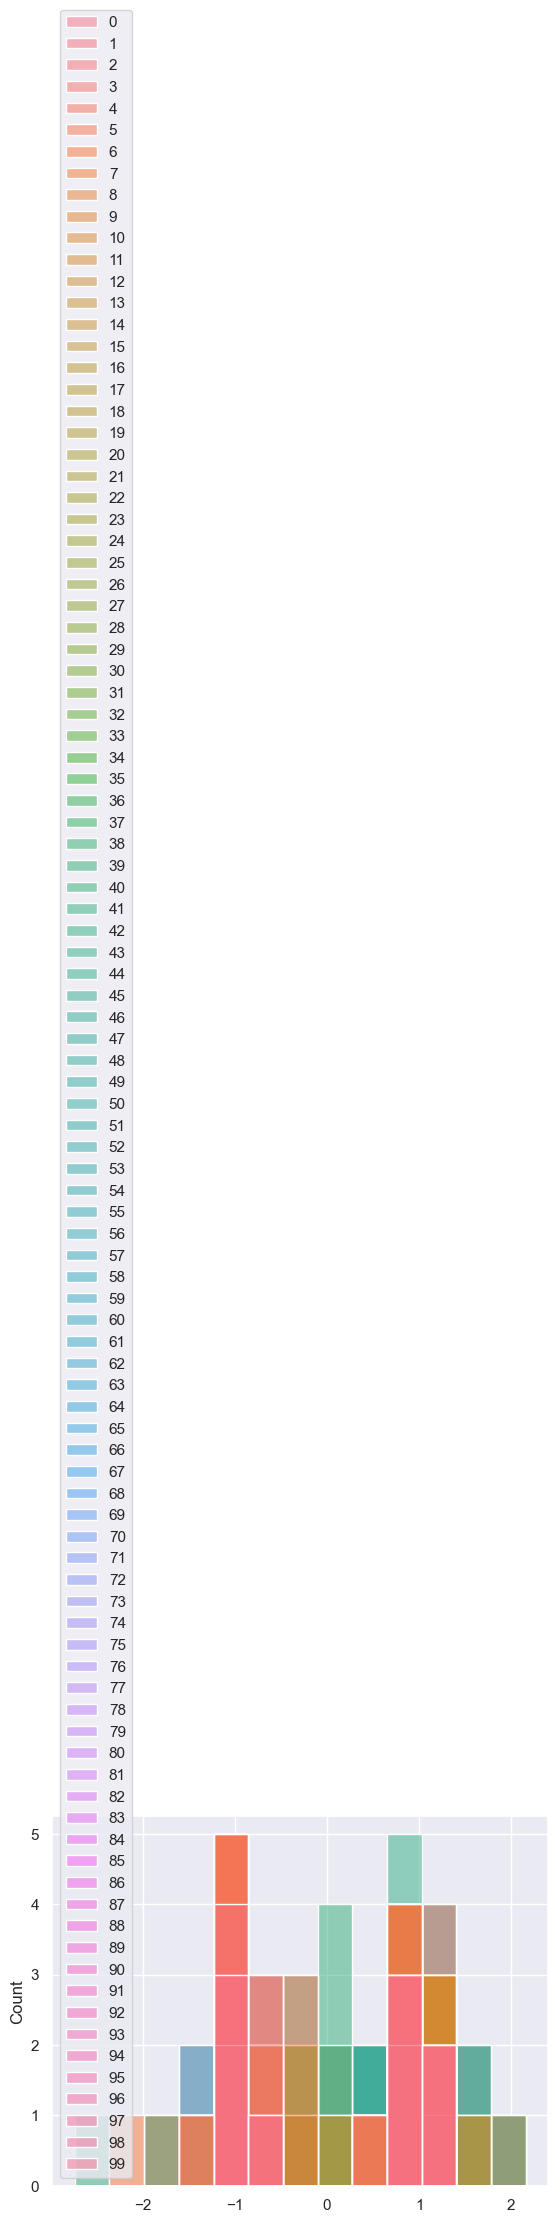

In [15]:
print (scaled_data)

sns.histplot(scaled_data)

In [16]:
pca = PCA()

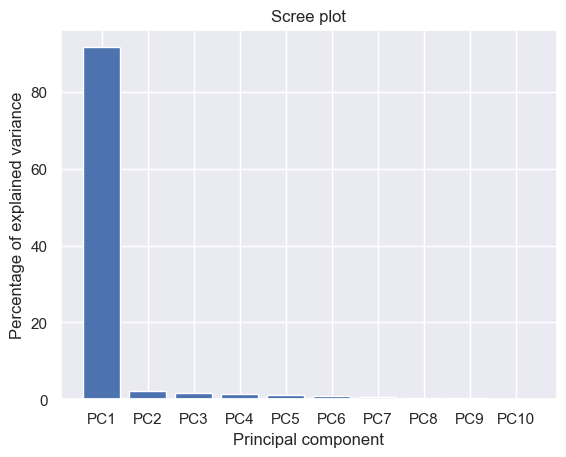

91.73155070168875 %


In [17]:
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ["PC" + str(x) for x in range(1, len(per_var) + 1)]
plt.bar(x=range(1, len(per_var) + 1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of explained variance')
plt.xlabel("Principal component")
plt.title("Scree plot")
plt.show()

print (f"{max(pca.explained_variance_ratio_) * 100} %")

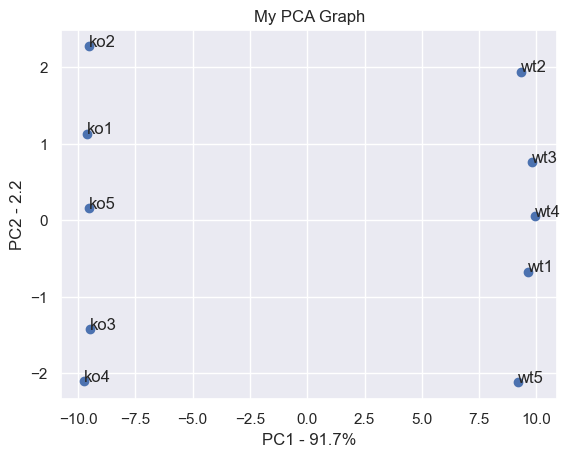

In [18]:
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title("My PCA Graph")
plt.xlabel("PC1 - {0}%".format(per_var[0]))
plt.ylabel("PC2 - {0}".format(per_var[1]))

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
plt.show()

The separation of the two clusters along the x-axis suggests that "wt" samples are very different from "ko" samples

In [19]:
loading_scores = pd.Series(pca.components_[0], index=genes)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
top_10_genes = sorted_loading_scores[0:10].index.values

print (loading_scores[top_10_genes])


gene73   -0.104371
gene43   -0.104368
gene97    0.104352
gene78   -0.104351
gene82   -0.104346
gene10   -0.104341
gene62    0.104327
gene67    0.104321
gene50   -0.104299
gene83   -0.104296
dtype: float64


In [20]:
print (per_var)

[91.7  2.2  1.5  1.4  1.   0.9  0.5  0.4  0.3  0. ]


In [21]:
data.head()

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,815,841,793,790,773,543,527,524,557,495
gene2,842,927,889,915,898,489,472,472,487,530
gene3,752,704,749,715,758,1014,885,983,963,965
gene4,293,305,301,320,329,36,60,42,37,45
gene5,665,650,650,632,653,480,470,502,468,509


In [22]:
print (pca_data)

[[ 9.62661623e+00 -6.71206202e-01 -1.10224064e+00 -3.06703085e-01
   1.71605120e+00 -6.18661698e-01 -6.48110677e-01 -8.65128260e-01
   5.07852779e-01  1.38777878e-15]
 [ 9.32494181e+00  1.94241456e+00 -9.64131891e-01 -1.39564551e+00
  -3.53166572e-01 -6.58027377e-01 -2.88400074e-01  4.54839885e-01
  -9.71736757e-01  4.16333634e-16]
 [ 9.79855794e+00  7.54301467e-01  1.95631269e+00 -4.67602381e-01
  -3.02603773e-01 -3.46281502e-01  6.30580517e-02  7.63705243e-01
   1.00515978e+00  3.69149156e-15]
 [ 9.91880784e+00  5.63256962e-02 -6.37008517e-02 -7.87655175e-02
  -1.16186341e+00  2.10373105e+00  3.82680746e-01 -7.64620082e-01
  -2.10234562e-02  6.38378239e-16]
 [ 9.20848895e+00 -2.12102933e+00  1.60071574e-01  2.26994966e+00
   1.01635024e-01 -5.50529116e-01  4.92259831e-01  4.21517533e-01
  -5.58548642e-01 -2.77555756e-17]
 [-9.60379385e+00  1.13167001e+00  1.01036830e+00 -4.41020106e-01
   1.15685015e+00 -3.64572063e-01  1.47007508e+00 -4.92079664e-01
  -2.45956638e-01 -1.16573418e-15

In [23]:
gene = ["gene" + str(i) for i in range(1, 11)]
pca_data_1 = pd.DataFrame(pca_data, columns=(*wt, *ko), index=gene)
pca_data_1

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,9.626616,-0.671206,-1.102241,-0.306703,1.716051,-0.618662,-0.648111,-0.865128,0.507853,1.387779e-15
gene2,9.324942,1.942415,-0.964132,-1.395646,-0.353167,-0.658027,-0.288400,0.454840,-0.971737,4.163336e-16
gene3,9.798558,0.754301,1.956313,-0.467602,-0.302604,-0.346282,0.063058,0.763705,1.005160,3.691492e-15
gene4,9.918808,0.056326,-0.063701,-0.078766,-1.161863,2.103731,0.382681,-0.764620,-0.021023,6.383782e-16
gene5,9.208489,-2.121029,0.160072,2.269950,0.101635,-0.550529,0.492260,0.421518,-0.558549,-2.775558e-17
gene6,-9.603794,1.131670,1.010368,-0.441020,1.156850,-0.364572,1.470075,-0.492080,-0.245957,-1.165734e-15
gene7,-9.525197,2.271328,-1.374559,1.975820,-0.817484,-0.388536,-0.201158,-0.086363,0.468361,3.608225e-16
gene8,-9.464878,-1.422173,-1.748011,-0.928249,0.566993,1.037375,0.302455,0.974987,0.297892,-4.163336e-16
gene9,-9.753102,-2.102498,0.375069,-1.090877,-1.699621,-1.167656,-0.254742,-0.486872,-0.001066,-1.526557e-15
gene10,-9.530442,0.160866,1.750822,0.463094,0.793209,0.953158,-1.318118,0.080013,-0.480934,-2.775558e-17


['wt1', 'wt2', 'wt3', 'wt4', 'wt5']


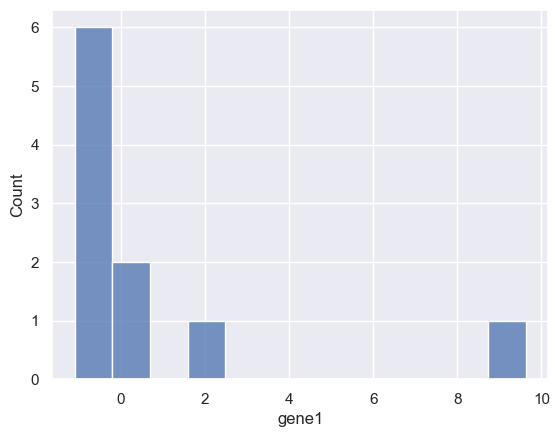

In [24]:


sns.histplot(x=pca_data_1.loc["gene1"], data=pca_data_1)
print (wt)

/Users/thomasnguyen/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.25777143239974976, pvalue=0.0)


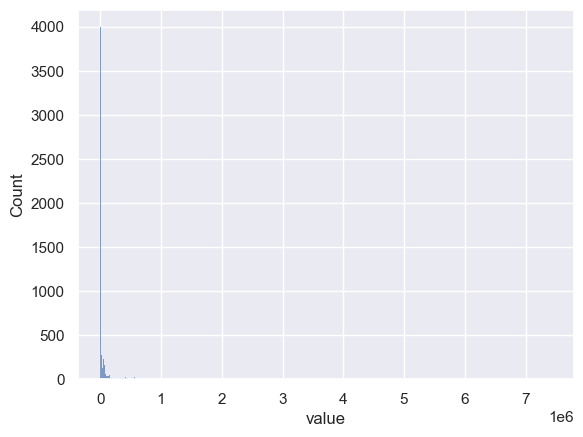

In [25]:
sns.histplot(x="value", data=emission) 
print (shapiro(emission.value))

In [26]:
emission.head()

,country,year,value,category,country_encoded,scaled_value
0,Australia,2014,393126.946994,carbon_dioxide_co2_emissions_without_land_use_...,0,0.233278
1,Australia,2013,396913.936530,carbon_dioxide_co2_emissions_without_land_use_...,0,0.237988
2,Australia,2012,406462.847704,carbon_dioxide_co2_emissions_without_land_use_...,0,0.249863
3,Australia,2011,403705.528314,carbon_dioxide_co2_emissions_without_land_use_...,0,0.246434
4,Australia,2010,406200.993184,carbon_dioxide_co2_emissions_without_land_use_...,0,0.249538


In [27]:
emission.head()

,country,year,value,category,country_encoded,scaled_value
0,Australia,2014,393126.946994,carbon_dioxide_co2_emissions_without_land_use_...,0,0.233278
1,Australia,2013,396913.936530,carbon_dioxide_co2_emissions_without_land_use_...,0,0.237988
2,Australia,2012,406462.847704,carbon_dioxide_co2_emissions_without_land_use_...,0,0.249863
3,Australia,2011,403705.528314,carbon_dioxide_co2_emissions_without_land_use_...,0,0.246434
4,Australia,2010,406200.993184,carbon_dioxide_co2_emissions_without_land_use_...,0,0.249538


In [31]:
unique = emission.country.unique()
unique

array(['Australia', 'Austria', 'Belarus', 'Belgium', 'Bulgaria', 'Canada',
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia',
       'European Union', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'Ireland', 'Italy', 'Japan', 'Latvia',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Monaco',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Romania', 'Russian Federation', 'Slovakia', 'Slovenia', 'Spain',
       'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom',
       'United States of America'], dtype=object)

In [36]:
unique_countries = [emission[emission.country == i] for i in unique]

# More helpful for indexing
unique_countries[1]

,country,year,value,category,country_encoded,scaled_value
25,Austria,2014,64262.563993,carbon_dioxide_co2_emissions_without_land_use_...,1,-0.175705
26,Austria,2013,67957.121112,carbon_dioxide_co2_emissions_without_land_use_...,1,-0.171110
27,Austria,2012,67698.658635,carbon_dioxide_co2_emissions_without_land_use_...,1,-0.171432
28,Austria,2011,70327.167044,carbon_dioxide_co2_emissions_without_land_use_...,1,-0.168163
29,Austria,2010,72531.826129,carbon_dioxide_co2_emissions_without_land_use_...,1,-0.165421
...,...,...,...,...,...,...
7344,Austria,1994,926.173536,sulphur_hexafluoride_sf6_emissions_in_kilotonn...,1,-0.254471
7345,Austria,1993,744.003132,sulphur_hexafluoride_sf6_emissions_in_kilotonn...,1,-0.254698
7346,Austria,1992,656.271787,sulphur_hexafluoride_sf6_emissions_in_kilotonn...,1,-0.254807
7347,Austria,1991,614.140442,sulphur_hexafluoride_sf6_emissions_in_kilotonn...,1,-0.254859


In [35]:
emission

,country,year,value,category,country_encoded,scaled_value
0,Australia,2014,393126.946994,carbon_dioxide_co2_emissions_without_land_use_...,0,0.233278
1,Australia,2013,396913.936530,carbon_dioxide_co2_emissions_without_land_use_...,0,0.237988
2,Australia,2012,406462.847704,carbon_dioxide_co2_emissions_without_land_use_...,0,0.249863
3,Australia,2011,403705.528314,carbon_dioxide_co2_emissions_without_land_use_...,0,0.246434
4,Australia,2010,406200.993184,carbon_dioxide_co2_emissions_without_land_use_...,0,0.249538
...,...,...,...,...,...,...
8401,United States of America,1994,593.222570,unspecified_mix_of_hydrofluorocarbons_hfcs_and...,42,-0.254885
8402,United States of America,1993,586.939752,unspecified_mix_of_hydrofluorocarbons_hfcs_and...,42,-0.254893
8403,United States of America,1992,574.414624,unspecified_mix_of_hydrofluorocarbons_hfcs_and...,42,-0.254909
8404,United States of America,1991,566.900968,unspecified_mix_of_hydrofluorocarbons_hfcs_and...,42,-0.254918


In [38]:
type(unique_countries)

list

In [39]:
unique_countries[0]

,country,year,value,category,country_encoded,scaled_value
0,Australia,2014,393126.946994,carbon_dioxide_co2_emissions_without_land_use_...,0,0.233278
1,Australia,2013,396913.936530,carbon_dioxide_co2_emissions_without_land_use_...,0,0.237988
2,Australia,2012,406462.847704,carbon_dioxide_co2_emissions_without_land_use_...,0,0.249863
3,Australia,2011,403705.528314,carbon_dioxide_co2_emissions_without_land_use_...,0,0.246434
4,Australia,2010,406200.993184,carbon_dioxide_co2_emissions_without_land_use_...,0,0.249538
...,...,...,...,...,...,...
7319,Australia,1994,282.640896,sulphur_hexafluoride_sf6_emissions_in_kilotonn...,0,-0.255272
7320,Australia,1993,264.759156,sulphur_hexafluoride_sf6_emissions_in_kilotonn...,0,-0.255294
7321,Australia,1992,246.858849,sulphur_hexafluoride_sf6_emissions_in_kilotonn...,0,-0.255316
7322,Australia,1991,228.944834,sulphur_hexafluoride_sf6_emissions_in_kilotonn...,0,-0.255338


In [43]:
len(unique_countries)

43

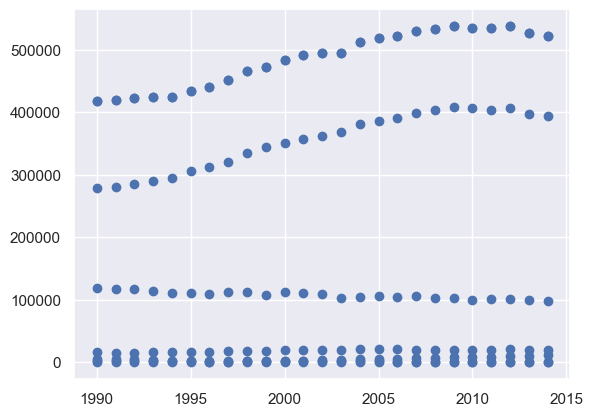

In [44]:
Australia = emission[emission.country == "Australia"]
plt.scatter(Australia.year, Australia.value)

In [46]:
Australia.groupby(["year"])["value"].mean()

year
1990    156983.643586
1991    157002.771560
1992    158655.040572
1993    158911.849712
1994    159034.859765
1995    162554.494060
1996    164926.485836
1997    169395.644180
1998    174893.292177
1999    177092.246542
2000    181292.184999
2001    184290.635976
2002    185527.537791
2003    185682.782238
2004    191891.340758
2005    194569.034798
2006    195943.946874
2007    198691.076378
2008    200135.065578
2009    201708.709734
2010    200219.038611
2011    200283.674507
2012    201516.589295
2013    197581.000225
2014    195898.909017
Name: value, dtype: float64